## Gait Video Study 
### Validating the estimated 3D poses via CoP computed on the treadmill 
### This code qualitatively and quantitatively validates the centroid of base of support of the estimated body coordinates with their respective treadmill extracted CoP's on a frame-wise or support group-wise basis

We will do qualitative and quantitative validation for CoP and centroid of BoS. 
* In this code, we will compile the quantitative results of distances and correlations between CoPs and centroids for each cohort, trial (W/WT) and support type (Single/Double). 
* Further, we will plot the butterfly diagrams for CoPs and centroids to qualitatively vizualize how treadmill CoPs match with BoS's centroid values. 
* We need to select one method of analysis out of shift approach and excursion approach.
* We need to collect statistics of our CoP validation analysis to put in the manuscript. 

In [111]:
from importlib import reload
from ml_utils import imports
reload(imports)
from ml_utils.imports import *

In [112]:
#Folder for CoP validation
cop_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\CoPvalidation\\'
#Path to store the new dataframes to be created for CoP validation 
path_viz_dataframes = cop_path + 'CoP_dataframes_for_viz\\'
#Path for CoP validation dataframes without hip height normalization
path_viz_dataframes_non_normalized = path_viz_dataframes+'non_hip_height_normalized\\'
#Path to log file corresponding to the sync files between frame numbers and treadmill identified events for each video
sync_log_file = cop_path + 'treamill_video_cop_sync.csv'
#Path to save the vizualization plots 
save_viz_path = cop_path+'CoPviz_plots\\'

### Utility functions 

In [ ]:
#To create the interpolated dataframe for computing the mean trajectory 
def create_mean_trajectory(video_name, copx, copy, centroidx, centroidy, video):
    '''
    Function to create the mean butterfly trajectory for given video's cop and centroid
    '''
    indices = video[video==video_name].index
    interpolated_df = pd.DataFrame(columns = range(101))
    lat_list, ap_list = [], []
    lat_list_abs, ap_list_abs = [], []
    for idx in indices:
        interpolated_df.loc[len(interpolated_df)] = ['copx'] + list(np.interp(range(100), range(len(copx[idx])), copx[idx]))
        interpolated_df.loc[len(interpolated_df)] = ['copy'] + list(np.interp(range(100), range(len(copy[idx])), copy[idx]))
        interpolated_df.loc[len(interpolated_df)] = ['centroidx'] + list(np.interp(range(100), range(len(centroidx[idx])), centroidx[idx]))
        interpolated_df.loc[len(interpolated_df)] = ['centroidy'] + list(np.interp(range(100), range(len(centroidy[idx])), centroidy[idx]))
#         print (centroidx[idx])
#         print(copx[idx])
        lat = [i-j for i, j in zip(centroidx[idx], copx[idx])]
        ap = [i-j for i, j in zip(centroidy[idx], copy[idx])]
        lat_list.extend(lat)
        ap_list.extend(ap)
        lat_list_abs.extend([abs(x) for x in lat])
        ap_list_abs.extend([abs(x) for x in ap])
        eucl_list = [np.sqrt(i**2+j**2) for i, j in zip(lat_list, ap_list)]
    mean_traj = interpolated_df.groupby(0).mean()
    print ('Lateral mean and SD distance:', np.mean(lat_list), np.std(lat_list))
    print ('AP mean and SD distance:', np.mean(ap_list), np.std(ap_list))
    print ('Euclidean mean and SD distance:', np.mean(eucl_list), np.std(eucl_list))
    print ('Absolute lateral mean and SD distance:', np.mean(lat_list_abs), np.std(lat_list_abs))
    print ('Absolute AP mean and SD distance:', np.mean(ap_list_abs), np.std(ap_list_abs))
    return mean_traj

In [ ]:
def plot_butterfly_diagram_with_mean_traj(indices, copx, copy, centroidx, centroidy, mean_traj, color1 = 'c', color2 = 'r'):
    '''
    Function to create and save the butterfly plot for cop and centroid with mean trajectory 
    '''
    #Plotting stride-wise CoP and centroids for each video. These values are curated framewise for all frames in each stride. 
    #These values are mean centered for each stride, i.e. ideally each stride's butterfly plot's center must be origin (0, 0).
    for idx in indices:
        plt.figure(1)
        plt.plot(copx[idx], copy[idx], '-', color = color1, alpha = 0.4)
    plt.xlabel('x-coordinate', fontsize = 13)
    plt.ylabel('y-coordinate', fontsize = 13)
    plt.plot(mean_traj.loc['copx'], mean_traj.loc['copy'], 'k-', linewidth=4)
    plt.savefig(save_viz_path+folder+video[idx] + '_cop_butterfly_plot.png', dpi = 300)
    plt.show()
    
    for idx in indices:
        plt.figure(2)
        plt.plot(centroidx[idx], centroidy[idx],'-', color = color2, alpha = 0.4)
    plt.plot(mean_traj.loc['centroidx'], mean_traj.loc['centroidy'], 'k-', linewidth=4)
    plt.xlabel('x-coordinate', fontsize = 13)
    plt.ylabel('y-coordinate', fontsize = 13)
    plt.savefig(save_viz_path+folder+video[idx] + '_centroid_butterfly_plot.png', dpi = 300)
    plt.show()

### Stats 

In [32]:
#Shift method 
#Stats
#Reading the stats saved from the shift method file 
group_wise_cop_verify_stats = pd.read_csv(cop_path+'group_wise_cop_verify_stats_with_shift_method.csv', index_col = 0)
display(group_wise_cop_verify_stats.head())

,cohort,scenario,video,suport_group,mean_eucl,mean_lat,mean_ap,std_eucl,std_lat,std_ap,...,pearson_corr_ap_conf,pearson_p_ap_conf,spearman_corr_eucl_conf,spearman_p_eucl_conf,spearman_corr_lat_conf,spearman_p_lat_conf,spearman_corr_ap_conf,spearman_p_ap_conf,count_support_phases,count_strides
0,HOA,W,GVS_212_W_T2,SS,5.991739,0.507190,-2.278587,2.736199,3.341652,5.174155,...,-0.628458,1.186654e-12,-0.210451,0.032864,-0.745014,1.832964e-19,-0.626730,1.425400e-12,103,52.0
1,HOA,W,GVS_212_W_T2,DS,6.543741,0.322339,3.504041,3.964169,1.967803,6.502363,...,-0.100157,3.141200e-01,-0.210451,0.032864,-0.401803,2.590114e-05,-0.073233,4.622482e-01,103,52.0
2,HOA,W,GVS_213_W_T1,SS,3.840958,-0.890769,-0.672974,2.261376,3.057378,3.045136,...,0.229973,5.730624e-02,-0.216831,0.071389,-0.690099,5.404276e-11,0.054695,6.553340e-01,69,35.0
3,HOA,W,GVS_213_W_T1,DS,3.731545,0.218784,-0.189720,4.209470,1.794563,5.323509,...,0.374007,1.425533e-03,-0.216831,0.071389,-0.253049,3.455220e-02,0.081095,5.045323e-01,70,35.0
4,HOA,W,GVS_214_W_T1,SS,13.230111,-1.195555,-0.512673,5.860872,8.063847,11.944364,...,-0.324253,5.169025e-04,-0.413228,0.000103,-0.177668,6.210774e-02,-0.259266,6.000193e-03,111,56.0


In [33]:
group_wise_cop_verify_stats_aggregated = group_wise_cop_verify_stats.groupby(['cohort', 'scenario', 'suport_group']).mean()
group_wise_cop_verify_stats_aggregated.to_csv(cop_path + 'results\\group_wise_cop_verify_stats_with_shift_method_aggregated.csv')
group_wise_cop_verify_stats_aggregated

mean_eucl  mean_lat   mean_ap  std_eucl  \
cohort scenario suport_group                                            
HOA    W        DS             7.539357  0.227533  0.551866  5.504902   
                SS             8.449554 -0.178756 -1.400249  5.487880   
       WT       DS             8.201366 -0.433260 -0.218288  5.177546   
                SS             9.738217 -0.001631 -1.246576  5.262979   
MS     W        DS             8.683970 -0.129462 -3.974957  4.802168   
                SS             9.970666  0.070558  3.151532  4.775666   
       WT       DS             7.651844  0.171936 -0.001093  5.644276   
                SS            10.394005 -0.063260  0.679323  6.002486   
PD     W        DS            10.054177 -0.051186 -0.074072  6.421235   
                SS            11.071698 -0.447685  0.350938  7.271400   
       WT       DS            10.194027 -0.682743 -1.927550  6.369133   
                SS            10.446763  0.245851  0.395826  6.544055   

                               std_lat     std_ap  mean_lat_abs  mean_ap_abs  \
cohort scenario suport_group                                                   
HOA    W        DS            3.260049   8.274995      2.608495     6.499460   
                SS            4.666015   8.419271      4.020925     6.540005   
       WT       DS            3.246129   6.931310      2.688127     7.192181   
                SS            4.872591   7.655217      4.180306     8.017659   
MS     W        DS            2.590496   6.771085      2.036669     8.120170   
                SS            5.104053   7.169646      4.678275     8.014928   
       WT       DS            2.945946   8.004959      2.318332     6.860022   
                SS            5.534157   8.598247      4.840101     8.180049   
PD     W        DS            3.280856  10.438310      2.698409     9.180843   
                SS            4.889147  11.207456      4.110320     9.423513   
       WT       DS            3.206222  10.172569      2.711961     9.328983   
                SS            4.272603  10.369523      3.521333     9.103715   

                              std_lat_abs  std_ap_abs  ...  \
cohort scenario suport_group                           ...   
HOA    W        DS               1.980401    5.660171  ...   
                SS               2.375488    5.871399  ...   
       WT       DS               2.044690    5.432343  ...   
                SS               2.603992    5.666773  ...   
MS     W        DS               1.622425    4.926857  ...   
                SS               2.088119    5.348151  ...   
       WT       DS               1.891701    5.836125  ...   
                SS               2.701206    6.576394  ...   
PD     W        DS               1.950452    6.639915  ...   
                SS               2.703406    7.608082  ...   
       WT       DS               1.961349    6.686228  ...   
                SS               2.457997    6.885770  ...   

                              pearson_corr_ap_conf  pearson_p_ap_conf  \
cohort scenario suport_group                                            
HOA    W        DS                       -0.076865           0.217553   
                SS                       -0.079088           0.175689   
       WT       DS                       -0.103047           0.239298   
                SS                       -0.165213           0.182054   
MS     W        DS                       -0.008548           0.151232   
                SS                       -0.234471           0.099013   
       WT       DS                       -0.090947           0.235333   
                SS                       -0.319395           0.182110   
PD     W        DS                        0.287308           0.050075   
                SS                        0.167123           0.154639   
       WT       DS                        0.041144           0.137936   
                SS                        0.116396           0.27254

In [29]:
#Excursion method 
#Stats
#Reading the stats saved from the excursion method file 
group_wise_cop_verify_stats_excursion = pd.read_csv(cop_path+'group_wise_cop_verify_stats_with_excursion_method.csv', index_col = 0)
group_wise_cop_verify_stats_excursion.head()

,cohort,scenario,video,suport_group,mean_eucl,mean_lat,mean_ap,std_eucl,std_lat,std_ap,...,pearson_corr_ap_conf,pearson_p_ap_conf,spearman_corr_eucl_conf,spearman_p_eucl_conf,spearman_corr_lat_conf,spearman_p_lat_conf,spearman_corr_ap_conf,spearman_p_ap_conf,count_support_phases,count_strides
0,HOA,W,GVS_212_W_T2,SS,6.172003,0.092426,-2.891314,2.865857,3.341652,5.174155,...,-0.628458,1.186654e-12,-0.219139,0.026150,-0.745014,1.832964e-19,-0.626730,1.425400e-12,103,51.5
1,HOA,W,GVS_212_W_T2,DS,6.356946,-0.092426,2.891314,3.756388,1.967803,6.502363,...,-0.100157,3.141200e-01,-0.219139,0.026150,-0.401803,2.590114e-05,-0.073233,4.622482e-01,103,51.5
2,HOA,W,GVS_213_W_T1,SS,3.772175,-0.558768,-0.243365,2.182327,3.057378,3.045136,...,0.229973,5.730624e-02,-0.204339,0.089735,-0.690099,5.404276e-11,0.054695,6.553340e-01,69,35.0
3,HOA,W,GVS_213_W_T1,DS,3.860889,0.550785,0.239888,4.124883,1.794563,5.323509,...,0.374007,1.425533e-03,-0.204339,0.089735,-0.253049,3.455220e-02,0.081095,5.045323e-01,70,35.0
4,HOA,W,GVS_214_W_T1,SS,13.533604,-0.389950,-2.268629,5.462029,8.063847,11.944364,...,-0.324253,5.169025e-04,-0.430083,0.000050,-0.177668,6.210774e-02,-0.259266,6.000193e-03,111,41.5


In [23]:
group_wise_cop_verify_stats_excursion_aggregated = group_wise_cop_verify_stats_excursion.groupby(['cohort', 'scenario', 'suport_group']).mean()
group_wise_cop_verify_stats_excursion_aggregated.to_csv(cop_path + 'results\\group_wise_cop_verify_stats_with_excursion_method_aggregated.csv')
group_wise_cop_verify_stats_excursion_aggregated

mean_eucl  mean_lat   mean_ap  std_eucl  \
cohort scenario suport_group                                            
HOA    W        DS             7.700901  0.207487  1.003593  5.181361   
                SS             8.519393 -0.198802 -0.948522  5.121823   
       WT       DS             8.279355 -0.216185  0.562651  5.071959   
                SS             9.679856  0.215444 -0.465637  5.124266   
MS     W        DS             8.540524 -0.096780 -3.545568  4.530096   
                SS            10.227027  0.103240  3.580921  4.503140   
       WT       DS             8.237673  0.120054 -0.309973  5.607441   
                SS            10.003407 -0.115141  0.370443  5.745350   
PD     W        DS            10.130285  0.197689 -0.208341  6.329927   
                SS            11.032081 -0.198810  0.216670  7.208988   
       WT       DS            10.072656 -0.463284 -1.151950  6.163037   
                SS            10.613784  0.465310  1.171426  6.370392   

                               std_lat     std_ap  mean_lat_abs  mean_ap_abs  \
cohort scenario suport_group                                                   
HOA    W        DS            3.260049   8.274995      2.630652     6.724700   
                SS            4.666015   8.419271      4.036799     6.701777   
       WT       DS            3.246129   6.931310      2.682195     7.329080   
                SS            4.872591   7.655217      4.249476     7.988500   
MS     W        DS            2.590496   6.771085      2.060054     8.009634   
                SS            5.104053   7.169646      4.672275     8.394375   
       WT       DS            2.945946   8.004959      2.321998     7.508226   
                SS            5.534157   8.598247      4.845601     7.781101   
PD     W        DS            3.280856  10.438310      2.717656     9.283969   
                SS            4.889147  11.207456      4.130236     9.409617   
       WT       DS            3.206222  10.172569      2.703280     9.231676   
                SS            4.272603  10.369523      3.579445     9.326494   

                              std_lat_abs  std_ap_abs  ...  \
cohort scenario suport_group                           ...   
HOA    W        DS               1.941242    5.321942  ...   
                SS               2.298473    5.478741  ...   
       WT       DS               1.888883    5.326064  ...   
                SS               2.459983    5.558571  ...   
MS     W        DS               1.619066    4.622392  ...   
                SS               2.039330    5.023234  ...   
       WT       DS               1.871751    5.809016  ...   
                SS               2.687958    6.264522  ...   
PD     W        DS               1.859457    6.572066  ...   
                SS               2.606723    7.498410  ...   
       WT       DS               1.863951    6.476825  ...   
                SS               2.407966    6.686455  ...   

                              pearson_corr_ap_conf  pearson_p_ap_conf  \
cohort scenario suport_group                                            
HOA    W        DS                       -0.076865           0.217553   
                SS                       -0.079088           0.175689   
       WT       DS                       -0.103047           0.239298   
                SS                       -0.165213           0.182054   
MS     W        DS                       -0.008548           0.151232   
                SS                       -0.234471           0.099013   
       WT       DS                       -0.090947           0.235333   
                SS                       -0.319395           0.182110   
PD     W        DS                        0.287308           0.050075   
                SS                        0.167123           0.154639   
       WT       DS                        0.041144           0.137936   
                SS                        0.116396           0.27254

### Butterfly plot

In [113]:
#Shift case 
#Butterfly plot 
#Reading the dataframe with stride-normalized CoP and centroid to plot the butterfly diagrams using the shift method 
plotting_df_shift_method = pd.read_csv(cop_path+'frame_wise_cop_verify_plotting_shift_method.csv', index_col = 0)
display(plotting_df_shift_method.head())

#Reading the stride-wise divided stride-normalized CoP and centroid to plot the butterfly diagrams using the shift method 
plotting_df_shift_method_stride_wise = pd.read_csv(cop_path + 'frame_wise_cop_verify_plotting_shift_method_stride_wise.csv', index_col = 0)
display(plotting_df_shift_method_stride_wise.head())

,cohort,scenario,video,CoPX_framewise,CoPY_framewise,centroidX_framewise,centroidY_framewise
0,HOA,W,GVS_212_W_T2,"[-6.276050101629934, -5.739683813444529, -5.10...","[5.716499397089422, 4.749715196517002, 4.59918...","[-3.00181660456073, -3.5023121725166035, -3.82...","[12.84926067047374, 8.976082949126123, 8.15835..."
1,HOA,W,GVS_213_W_T1,"[-4.456447035817213, -2.9435162813688223, -0.9...","[1.2309574897694802, 2.3853138395755025, 4.882...","[1.4428926417835086, 0.6238335369060266, 0.211...","[13.532713399416679, 14.21111776920253, 11.429..."
2,HOA,W,GVS_214_W_T1,"[-3.7871948055080225, -3.839903139577828, -3.8...","[-23.797828892160652, -23.668532869977668, -23...","[-0.7059848855991078, 5.5729021546004205, 5.46...","[-21.459554195002, -43.6536062968554, -41.5903..."
3,HOA,W,GVS_215_W_T1,"[-10.924854695440892, -9.435980152303458, -6.6...","[21.858048526294823, 20.334821131169832, 19.13...","[2.063145704226258, 1.8957783297015496, 1.4067...","[24.345355591786387, 22.354353432060066, 19.91..."
4,HOA,W,GVS_216_W_T2,"[-6.926112459292703, -6.924175583607386, -6.90...","[-8.49450836547254, -8.244663621168286, -8.247...","[0.2921996317228306, -0.3591527215555246, -0.6...","[-18.811828458041873, -14.572983058739851, -10..."


,cohort,scenario,video,stride_number,CoPX_framewise,CoPY_framewise,centroidX_framewise,centroidY_framewise
0,HOA,W,GVS_212_W_T2,0,"[-6.276050101629934, -5.739683813444529, -5.10...","[5.716499397089422, 4.749715196517002, 4.59918...","[-3.00181660456073, -3.5023121725166035, -3.82...","[12.84926067047374, 8.976082949126123, 8.15835..."
1,HOA,W,GVS_212_W_T2,1,"[-5.055320272633367, -4.805542325304351, -4.13...","[2.8266179181952396, 2.7347191778419244, 3.183...","[-1.2888797525028366, -1.5964063221069722, -1....","[9.75285925298374, 6.639333939354913, 3.972682..."
2,HOA,W,GVS_212_W_T2,2,"[-7.361657062673373, -7.011707585062098, -6.13...","[-6.943239343886319, -6.201229703772299, -4.40...","[-4.689853467406294, -4.787227627204977, -4.58...","[3.2373748835632057, 2.320778943960306, 0.1454..."
3,HOA,W,GVS_212_W_T2,3,"[-3.125887230579309, -2.692001359378473, -1.91...","[-15.90435574816081, -15.672320015126303, -13....","[0.5164083196924878, 0.8213018023835446, 1.323...","[-9.033451816617344, -6.770165395951523, -7.68..."
4,HOA,W,GVS_212_W_T2,4,"[-8.13750004731476, -7.742147599886863, -6.552...","[-12.052101205397634, -11.34554966302727, -9.7...","[-5.429447021830086, -5.195419350247512, -6.31...","[1.0942198952547528, 0.9628520621157577, -4.45..."


In [235]:
folder = 'shift_frame_wise_butterfly_plots_stridebystride\\'
video = plotting_df_shift_method_stride_wise['video']
stride_number = plotting_df_shift_method_stride_wise['stride_number']

copx = plotting_df_shift_method_stride_wise['CoPX_framewise']
copx = copx.map(lambda x: ast.literal_eval(x))
copy = plotting_df_shift_method_stride_wise['CoPY_framewise']
copy = copy.map(lambda x: ast.literal_eval(x))

centroidx = plotting_df_shift_method_stride_wise['centroidX_framewise']
centroidx = centroidx.map(lambda x: ast.literal_eval(x))
centroidy = plotting_df_shift_method_stride_wise['centroidY_framewise']
centroidy = centroidy.map(lambda x: ast.literal_eval(x))

In [ ]:
#### Run only once #### 
#Plotting stride-wise CoP and centroids for each video. These values are curated framewise for all frames in each stride. 
#These values are mean centered for each stride, i.e. ideally each stride's butterfly plot's center must be origin (0, 0).
for idx in range(len(stride_number)):
    plt.figure(1)
    plt.plot(copx[idx], copy[idx], 'b*-', label = 'CoP')
    plt.plot(centroidx[idx], centroidy[idx],'ro-', label = 'BoS\'s centroid')
    plt.legend(fontsize = 13)
    plt.xlabel('x-coordinate', fontsize = 13)
    plt.ylabel('y-coordinate', fontsize = 13)
    plt.savefig(save_viz_path+folder+video[idx] + '_'+ str(stride_number[idx])+'_cop_centroid_butterfly_plot.png', dpi = 300)
    plt.show()

### Qualitatively comparing the CoP and centroid for some walks 

In [163]:
video_name = 'GVS_216_W_T2'
mean_traj_216_W_T2 = create_mean_trajectory(video_name, copx, copy, centroidx, centroidy, video)


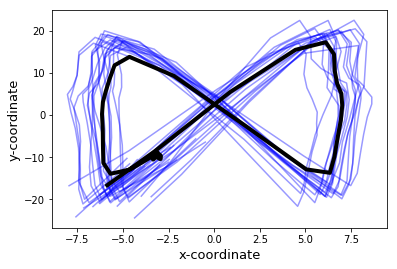

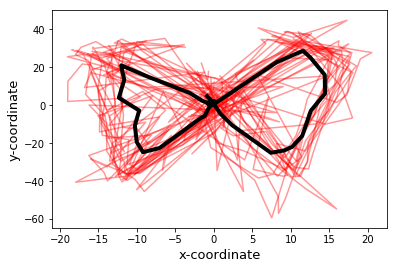

In [167]:
indices = video[video==video_name].index
plot_butterfly_diagram_with_mean_traj(indices[40:90], copx, copy, centroidx, centroidy, mean_traj_216_W_T2)

In [272]:
video_name = 'GVS_411_W_T1'
mean_traj_411_W_T1 = create_mean_trajectory(video_name, copx, copy, centroidx, centroidy, video)


Lateral mean and SD distance: 1.7584351383499216e-15 6.679533440991815
AP mean and SD distance: -4.5373530188597494e-15 11.030175041383997
Euclidean mean and SD distance: 11.83376797122625 5.122778936873831
Absolute lateral mean and SD distance: 5.806348699186621 3.30189063610256
Absolute AP mean and SD distance: 9.553963110011065 5.5123996894381815


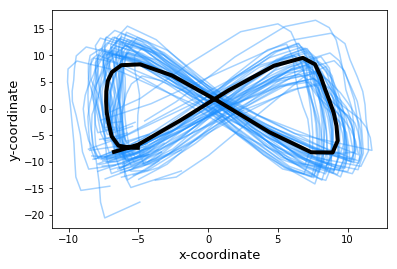

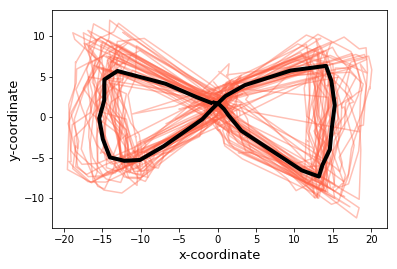

In [246]:
indices = video[video==video_name].index
plot_butterfly_diagram_with_mean_traj(indices[10:50], copx, copy, centroidx, centroidy, mean_traj_411_W_T1.iloc[:, :-70], 'dodgerblue', 'tomato')

In [8]:
#Excursion case
#Butterfly plot 
#Reading the dataframe with stride-normalized CoP and centroid to plot the butterfly diagrams using the excursion method 
plotting_df_excursion_method = pd.read_csv(cop_path+'frame_wise_cop_verify_plotting_excursion_method.csv', index_col = 0)
display(plotting_df_excursion_method.head())

#Reading the stride-wise divided stride-normalized CoP and centroid to plot the butterfly diagrams using the excursion method 
plotting_df_excursion_method_stride_wise = pd.read_csv(cop_path + 'frame_wise_cop_verify_plotting_excursion_method_stride_wise.csv', index_col = 0)
display(plotting_df_excursion_method_stride_wise.head())

,cohort,scenario,video,CoPX_framewise,CoPY_framewise,centroidX_framewise,centroidY_framewise
0,HOA,W,GVS_212_W_T2,"[-6.276050101629932, -5.739683813444526, -5.10...","[5.7164993970894145, 4.749715196516995, 4.5991...","[-3.0018166045607164, -3.502312172516604, -3.8...","[12.849260670473704, 8.976082949126116, 8.1583..."
1,HOA,W,GVS_213_W_T1,"[-4.456447035817215, -2.943516281368824, -0.96...","[1.2309574897695086, 2.385313839575531, 4.8822...","[1.4428926417835086, 0.6238335369060195, 0.211...","[13.53271339941675, 14.21111776920263, 11.4297..."
2,HOA,W,GVS_214_W_T1,"[-3.78719480550803, -3.8399031395778356, -3.88...","[-23.79782889216061, -23.668532869977625, -23....","[-0.7059848855991044, 5.572902154600413, 5.465...","[-21.45955419500205, -43.65360629685542, -41.5..."
3,HOA,W,GVS_215_W_T1,"[-10.924854695440894, -9.43598015230346, -6.66...","[21.858048526294787, 20.334821131169797, 19.13...","[2.06314570422625, 1.8957783297015345, 1.40676...","[24.345355591786397, 22.35435343205999, 19.914..."
4,HOA,W,GVS_216_W_T2,"[-6.926112459292699, -6.924175583607382, -6.90...","[-8.49450836547257, -8.244663621168314, -8.247...","[0.2921996317228137, -0.35915272155552014, -0....","[-18.8118284580419, -14.57298305873988, -10.00..."


,cohort,scenario,video,stride_number,CoPX_framewise,CoPY_framewise,centroidX_framewise,centroidY_framewise
0,HOA,W,GVS_212_W_T2,0,"[-6.276050101629932, -5.739683813444526, -5.10...","[5.7164993970894145, 4.749715196516995, 4.5991...","[-3.0018166045607164, -3.502312172516604, -3.8...","[12.849260670473704, 8.976082949126116, 8.1583..."
1,HOA,W,GVS_212_W_T2,1,"[-5.055320272633377, -4.805542325304362, -4.13...","[2.826617918195204, 2.734719177841889, 3.18324...","[-1.2888797525028348, -1.5964063221069704, -1....","[9.752859252983761, 6.639333939354991, 3.97268..."
2,HOA,W,GVS_212_W_T2,2,"[-7.361657062673368, -7.0117075850620925, -6.1...","[-6.943239343886343, -6.201229703772323, -4.40...","[-4.689853467406287, -4.787227627204963, -4.58...","[3.2373748835631417, 2.320778943960299, 0.1454..."
3,HOA,W,GVS_212_W_T2,3,"[-3.1258872305793135, -2.6920013593784775, -1....","[-15.90435574816076, -15.672320015126253, -13....","[0.5164083196924718, 0.8213018023835428, 1.323...","[-9.033451816617344, -6.770165395951523, -7.68..."
4,HOA,W,GVS_212_W_T2,4,"[-8.137500047314754, -7.742147599886858, -6.55...","[-12.052101205397594, -11.345549663027231, -9....","[-5.429447021830084, -5.19541935024751, -6.316...","[1.094219895254799, 0.9628520621157186, -4.456..."
